In [1]:
import os
import cv2 as cv
import numpy as np
import ipynb.fs.defs.Utils as Utils
import ipynb.fs.defs.GraphBuilding as GraphBuilding
import ipynb.fs.defs.BasicStitching as BasicStitching

In [2]:
#Directories
dataset_name = 'mountain_dataset'
dataset_dir = f'datasets/{dataset_name}'
output_dir ="output"
stitching_dir = "stitched"
partial_results_dir = "partial"

In [3]:
M_filename = f"M_{dataset_name}.npy"
C_filename = f"C_{dataset_name}.npy"
Z_filename = f"Z_{dataset_name}.npy"
Adj_filename = f"Adj_{dataset_name}.npy"
Weight_filename = f"W_{dataset_name}.npy"

In [4]:
#global variables
save_output = True
save_images = True
output_dir ="output"
results_dir = "results"
verbose = False

In [5]:
#simple graph parameters
simple_matching_threshold = 0.6
simple_matches_th = 10
simple_RANSACmaxIters = 2000
load_simple_matrices = True

In [6]:
#multi graph parameters
multi_matching_threshold = 0.6
multi_number_of_matches = 5
multi_matches_th = 20
multi_RANSACmaxIters = 10
load_multi_matrices = False

In [ ]:
#generalstitching parameters
automatic_idx_computation = True
idx_ref = 0
idxs = None
beautify = True

In [7]:
#basic stitching parameters
basic_warp_shape = [2000,2000]
basic_stitching_dir = "basic_stitching"

In [ ]:
#simple graph stitching parameters
simple_graph_stitching_dir = "simple_graph"
simple_graph_wap_shape = [10000,10000]

In [8]:
#Load images from the folder
imgs = Utils.load_images_from_folder(dataset_dir)

In [9]:
#verify if single graph matrices are already computed, otherwise compute them
if (os.path.isfile(os.path.join(output_dir, M_filename)) and load_single_matrices):
    M = np.load(os.path.join(output_dir,M_filename))
    C = np.load(os.path.join(output_dir,C_filename))
    Z = np.load(os.path.join(output_dir,Z_filename))
    adj_matrix = np.load(os.path.join(output_dir,Adj_filename))
    weight_matrix = np.load(os.path.join(output_dir,Weight_filename))
else:
    M, Z, C, adj_matrix, weight_matrix = GraphBuilding.build_graph_matrices(dataset_name,
                imgs,
                matching_threshold = simple_matching_threshold,
                number_of_matches=1,
                matches_th = simple_matches_th ,
                RANSACmaxIters = simple_RANSACmaxIters,
                save_output = save_output,
                save_images = save_images,
                output_dir = output_dir,
                results_dir = results_dir,
                verbose = verbose)

In [ ]:
if automatic_idx_computation:
    idx_ref = Utils.get_reference_node(adj_matrix)

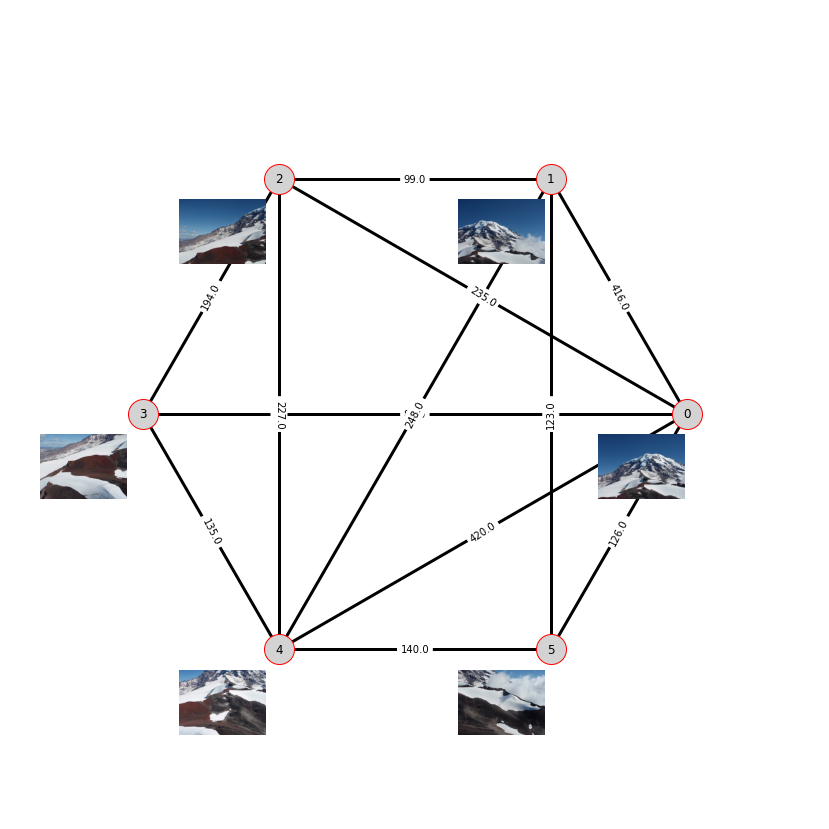

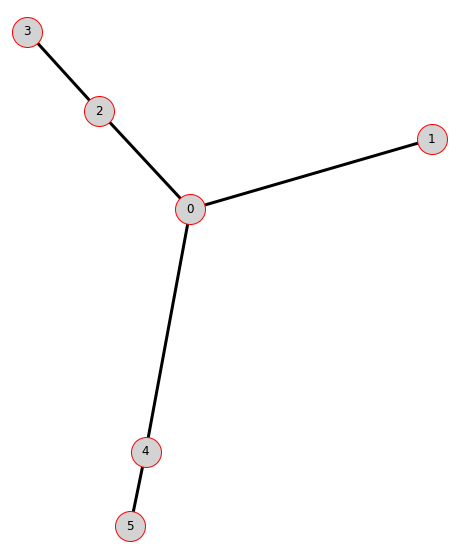

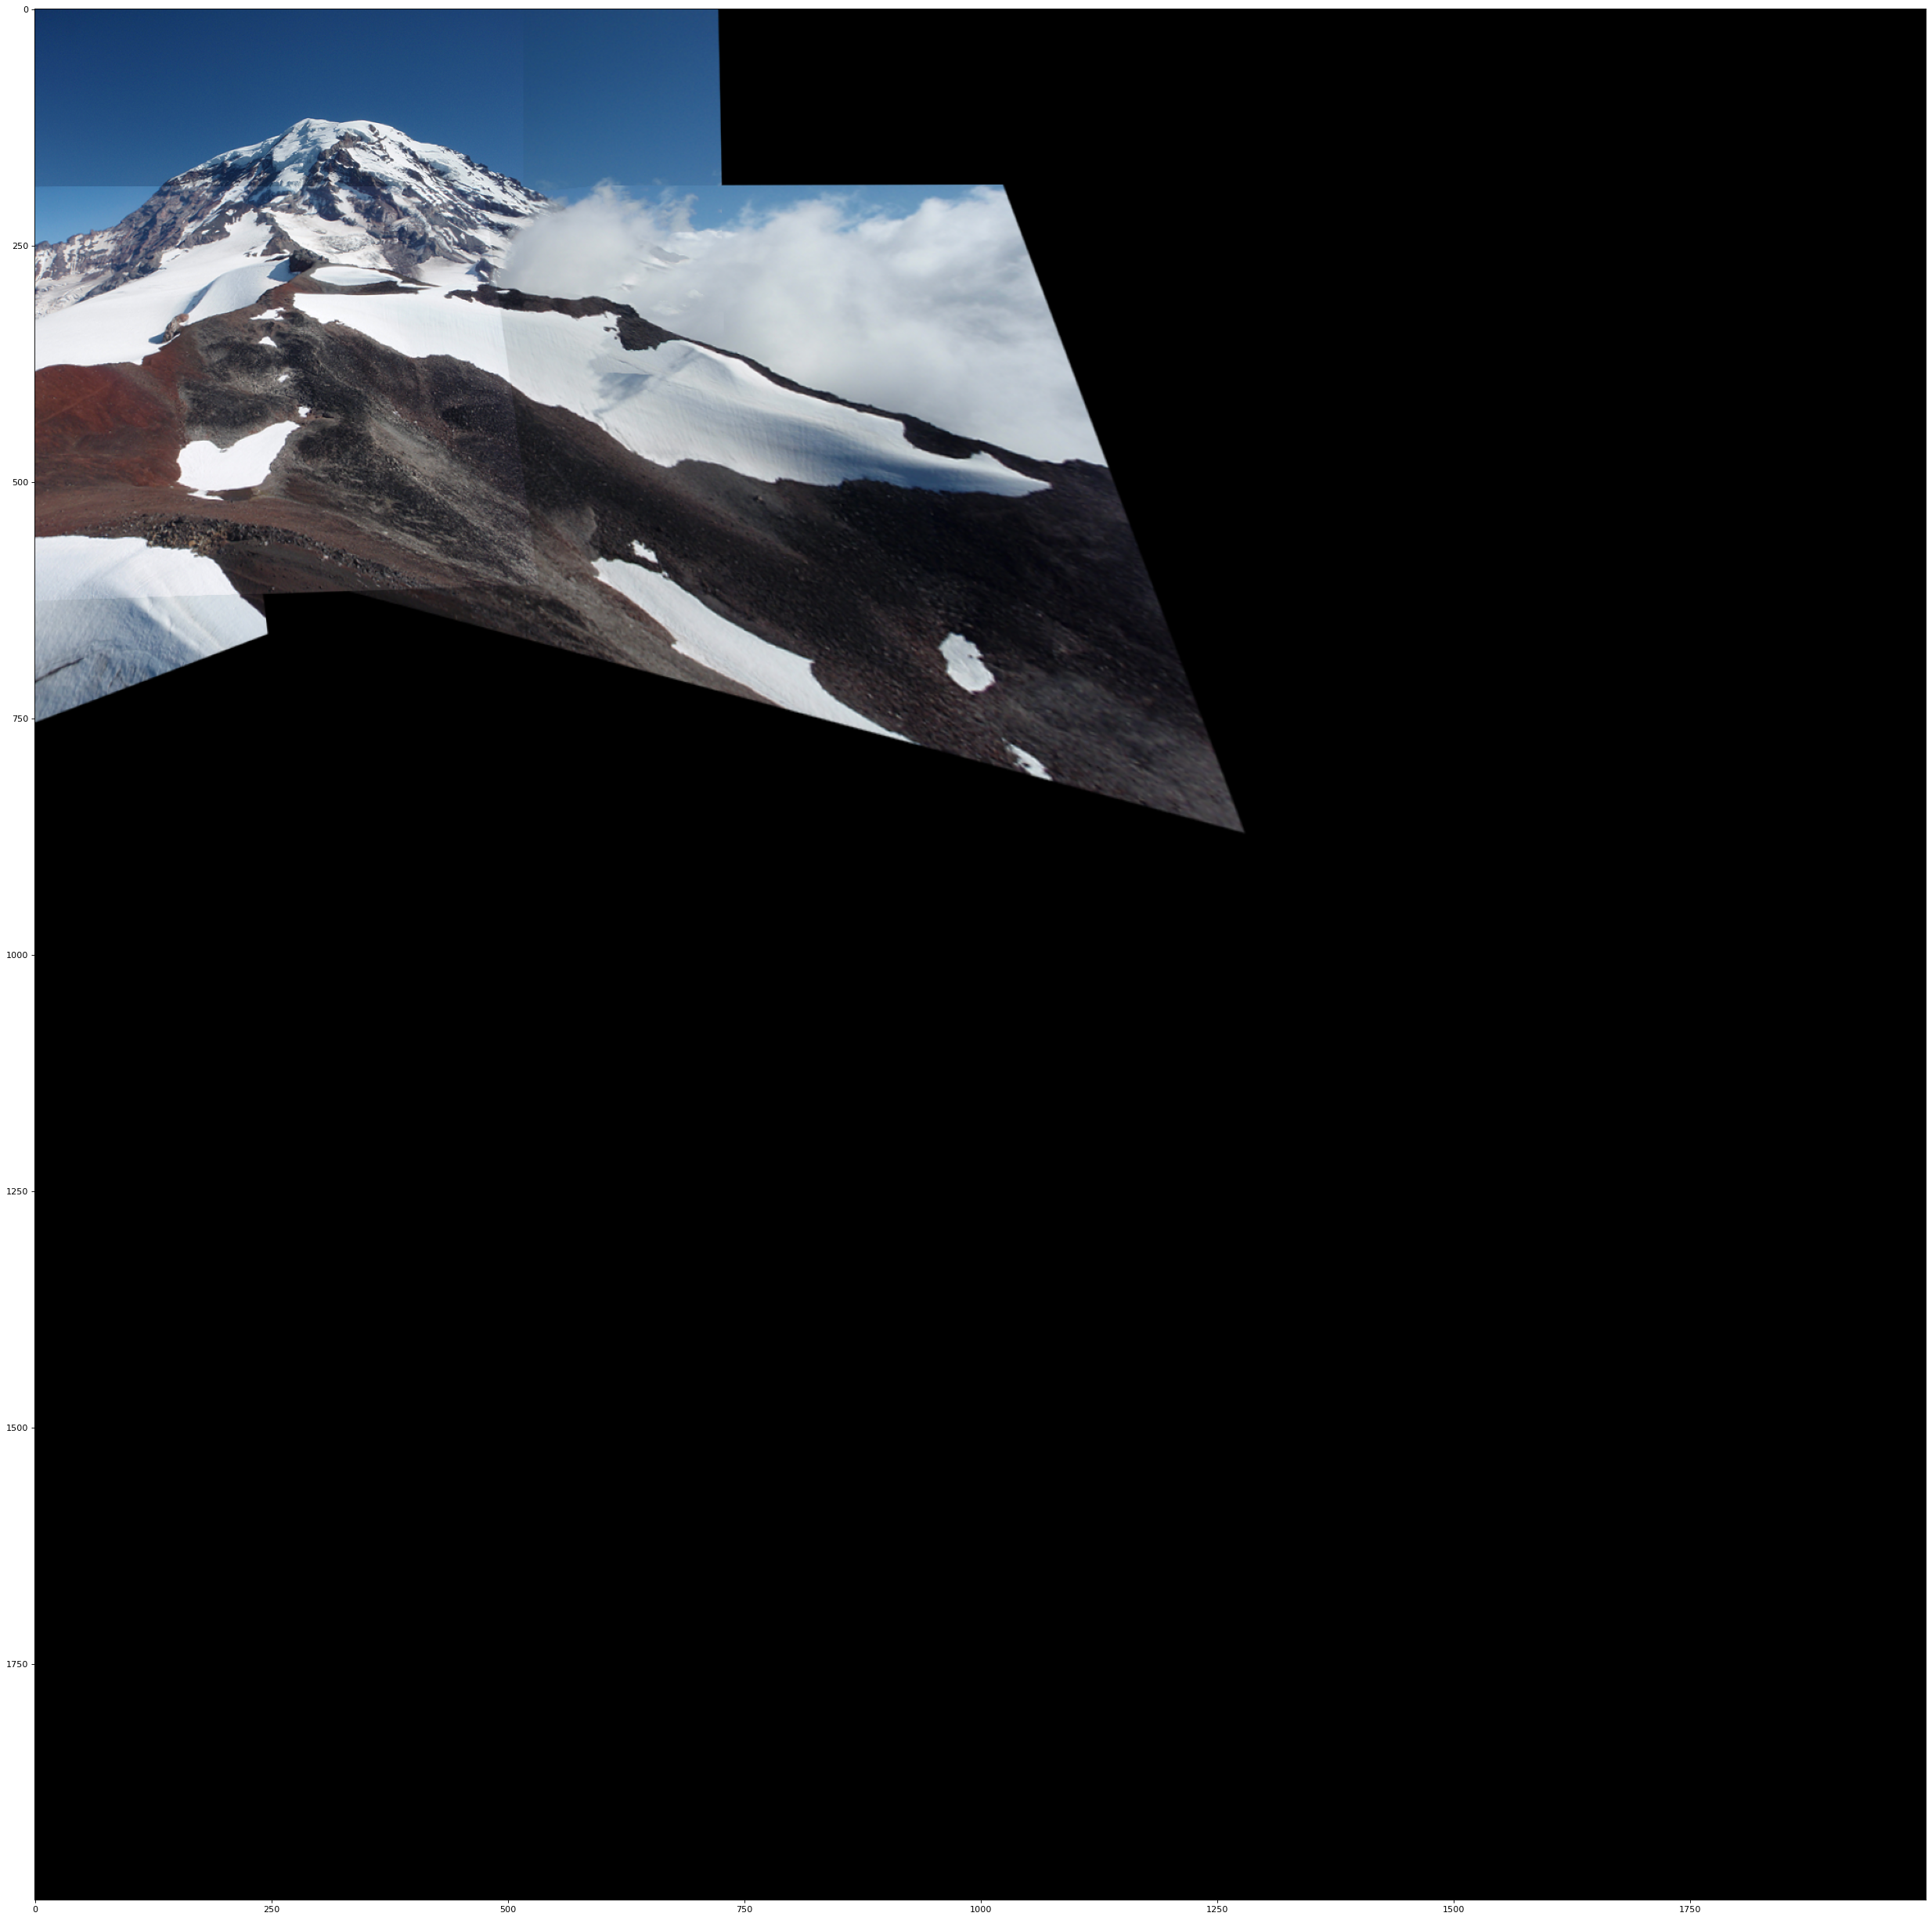

In [10]:
#basic stitching without synchronization
basic_stitched_image = BasicStitching.basic_stitching(dataset_name,
                    imgs,
                    Z, 
                    adj_matrix, 
                    weight_matrix,
                    idx_ref = idx_ref
                    verbose = verbose,
                    save_output = save_output,
                    stitching_dir = stitching_dir,
                    partial_results_dir = partial_results_dir,
                    basic_stitching_dir = basic_stitching_dir,
                    warp_shape = basic_warp_shape
                   )

In [ ]:
H_simple_graph, simple_graph_stitched_image = simple_graph_stitching(dataset_name,
                            imgs,
                            M, 
                            idx_ref = idx_ref,
                            idxs = idxs,
                            verbose = verbose,
                            save_output = save_output,
                            beautify = beautify,
                            stitching_dir = stitching_dir,
                            graph_stitching_dir = simple_graph_stitching_dir,
                            warp_shape = simple_graph_warp_shape ):